<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Data-Science/blob/main/StatsModelsAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn.datasets._california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline


california_dataset = sklearn.datasets.fetch_california_housing(as_frame=True)
print(california_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = california_dataset.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<ipython-input-4-497436ca1d1f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MedHouseVal'])


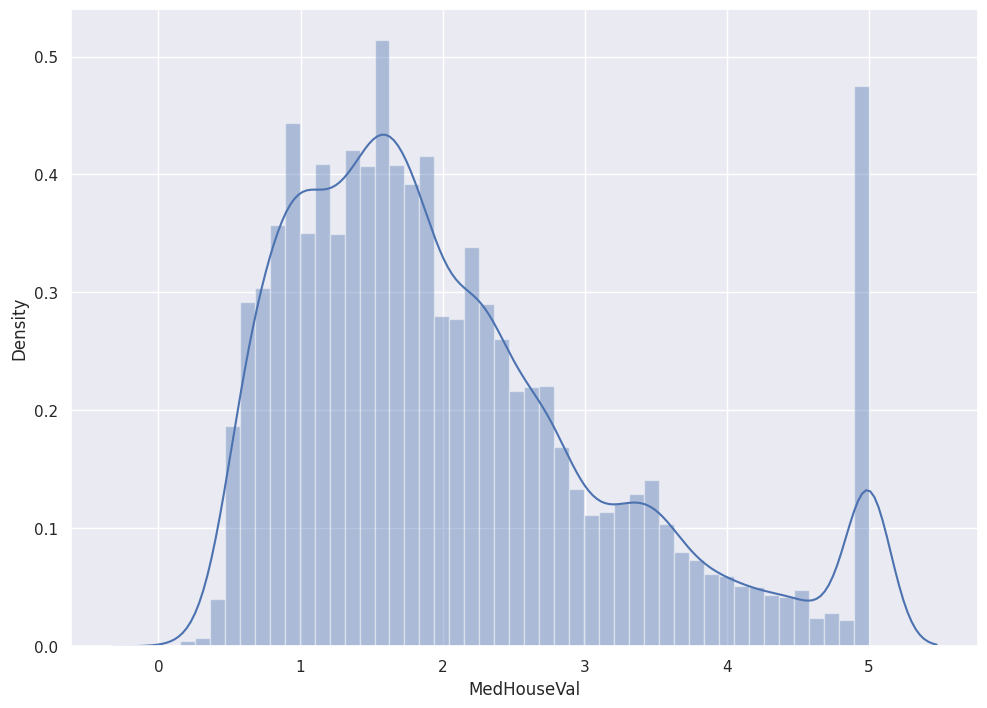

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MedHouseVal'])
plt.show()


<Axes: >

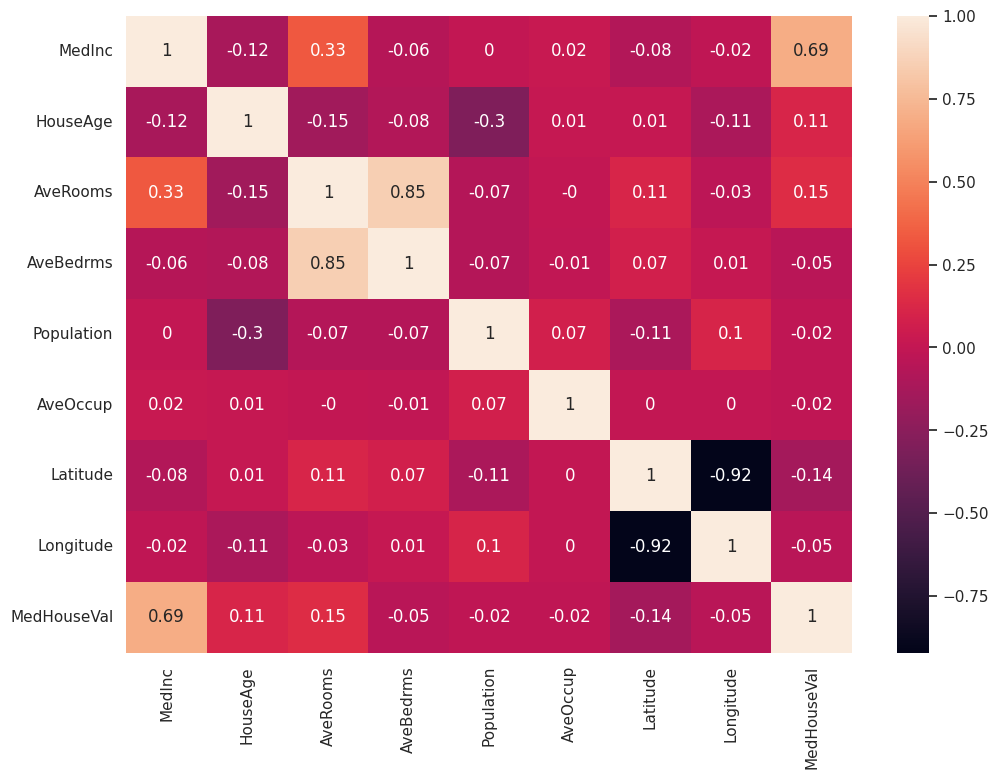

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

houseAGe has coor = .11, averooms has coor = .15

In [ ]:
X = df[["MedInc", "AveRooms", "HouseAge", "Population", "AveOccup", "Latitude", "Longitude"]]
Y = df['MedHouseVal']

In [ ]:
X.describe()

,MedInc,AveRooms,HouseAge,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,5.429000,28.639486,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,2.474173,12.585558,1132.462122,10.386050,2.135952,2.003532
min,0.499900,0.846154,1.000000,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,4.440716,18.000000,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,5.229129,29.000000,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,6.052381,37.000000,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,141.909091,52.000000,35682.000000,1243.333333,41.950000,-114.310000


also MinMaxScaler
  between 0 and 1
standardScaler
  fits the data

In [ ]:
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X), columns = X.columns)

In [ ]:
X.describe()

,MedInc,AveRooms,HouseAge,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,6.609700e-17,5.508083e-18,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.852319e+00,-2.196180e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-3.994496e-01,-8.453931e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,-8.078489e-02,2.864572e-02,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,2.519615e-01,6.643103e-01,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,5.516324e+01,1.856182e+00,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 7)
(4128, 7)
(16512,)
(4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)


In [ ]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.7321902953287883
R2 score is 0.5936794784904629




In [ ]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

In [ ]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.7376507850005884
R2 score is 0.6056135582133915


low correlation coeff doesn't mean it is less statistically
significant !!!!!!!

1.point estimate
2. std error

95% CI: point +/- 2*(std error)


x = point/std.error = T STATISTIC





In [ ]:
#-----------for more in-depth diagnostics ----------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)

model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     3445.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:52:41   Log-Likelihood:                -18282.
No. Observations:               16512   AIC:                         3.658e+04
Df Residuals:                   16504   BIC:                         3.664e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0661      0.006    362.500      0.0

t val  = coef / std err = t
2.0660 + 2* 0.006 = conf int(0.975)

houseAGe has coor = .11,
averooms has coor = .15
AveRooms       0.0438      0.006      6.999      0.000       0.032       0.056
HouseAge       0.1186      0.006     18.684      0.000       0.106       0.131
avrooms has 7.0
husage has 18
coor ha<ar
tval ha>ar

In [ ]:
ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(Y_train, ypred)

print(rmse)

0.7321902953287883
